# One-push dataset visualizer

This notebook helps you inspect the .npy arrays stored at the provided path. It will:
- discover .npy files for the given dataset base path
- print shapes, dtypes and simple stats
- display a small montage of sample frames from arrays that look like images

If you use a virtualenv named `mujoco` locally, activate it with `workon mujoco` before running this notebook. If packages are missing, see the final cell for install hints.

In [3]:
# Imports and helpers
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import io
import base64

plt.rcParams['figure.figsize'] = (10, 6)

def is_image_like(arr):
    # Heuristic: 3 dims (H,W,3) or 4 dims (T,H,W,3) or (T,H,W) grayscale
    if not isinstance(arr, np.ndarray):
        return False
    if arr.ndim == 3 and (arr.shape[2] == 3 or arr.shape[2] == 1):
        return True
    if arr.ndim == 4 and (arr.shape[-1] == 3 or arr.shape[-1] == 1):
        return True
    if arr.ndim == 3 and arr.dtype == np.uint8:
        return True
    return False

def show_montage(frames, ncols=5, cmap=None, title=None):
    # frames: list or array of images in HxW or HxWxC (C==3 or 1)
    frames = list(frames)
    n = len(frames)
    ncols = min(ncols, n)
    nrows = (n + ncols - 1) // ncols
    fig, axs = plt.subplots(nrows, ncols, squeeze=False)
    for i in range(nrows * ncols):
        r = i // ncols
        c = i % ncols
        ax = axs[r][c]
        ax.axis('off')
        if i < n:
            img = frames[i]
            if img.ndim == 2:
                ax.imshow(img, cmap=cmap)
            else:
                # clip or normalize if float
                if np.issubdtype(img.dtype, np.floating):
                    mi = np.nanmin(img)
                    ma = np.nanmax(img)
                    if ma > mi:
                        img = (img - mi) / (ma - mi)
                    img = np.clip(img, 0, 1)
                ax.imshow(img.astype('float32'))
    if title:
        fig.suptitle(title)
    plt.tight_layout()
    plt.show()

def take_sample_frames(arr, max_frames=10):
    # Return list of up to max_frames representative frames from arr
    if arr.ndim == 4:
        # (T,H,W,C) or (T,H,W)
        T = arr.shape[0]
        idx = np.linspace(0, max(0, T-1), min(max_frames, T), dtype=int)
        return [arr[i] for i in idx]
    if arr.ndim == 3 and arr.shape[-1] in (1,3):
        # single image HWC
        return [arr]
    if arr.ndim == 3 and arr.shape[0] > 1 and arr.shape[1] > 1:
        # maybe CHW or THW - be conservative and return a slice
        return [arr]
    return [arr]

In [4]:
# Set the dataset base path here. Replace with your exact file/directory if needed.
dataset_base = '/common/users/shared/robot_learning/dm1487/namo/datasets/images/oct26/train/1push/ilab1_env_000010'

# discover candidate .npy and .npz files
candidates = []
if os.path.isdir(dataset_base):
    candidates = sorted(
        glob.glob(os.path.join(dataset_base, '*.npy')) +
        glob.glob(os.path.join(dataset_base, '*.npz'))
    )
else:
    # try base + .npy/.npz and any files that start with the base name
    if os.path.exists(dataset_base + '.npy'):
        candidates.append(dataset_base + '.npy')
    if os.path.exists(dataset_base + '.npz'):
        candidates.append(dataset_base + '.npz')
    candidates += sorted(glob.glob(dataset_base + '*.npy') + glob.glob(dataset_base + '*.npz'))

print('Discovered .npy/.npz files:')
for p in candidates:
    print(' -', p)

if len(candidates) == 0:
    print('\nNo .npy or .npz files found. Double-check the path. If the data is compressed or in another folder, update `dataset_base`.')

Discovered .npy/.npz files:
 - /common/users/shared/robot_learning/dm1487/namo/datasets/images/oct26/train/1push/ilab1_env_000010/ilab1_env_000010_episode_0_neighbour_0_goal.npz
 - /common/users/shared/robot_learning/dm1487/namo/datasets/images/oct26/train/1push/ilab1_env_000010/ilab1_env_000010_episode_0_neighbour_1_goal.npz



File: /common/users/shared/robot_learning/dm1487/namo/datasets/images/oct26/train/1push/ilab1_env_000010/ilab1_env_000010_episode_0_neighbour_0_goal.npz
 archive members: ['robot', 'goal', 'movable', 'static', 'reachable', 'target_object', 'target_goal', 'robot_distance', 'goal_distance', 'episode_id', 'task_id', 'algorithm', 'solution_depth', 'search_time_ms', 'nodes_expanded', 'robot_goal', 'xml_file', 'action_object_ids', 'action_targets']
  member: robot  dtype= float32  shape= (224, 224)
   min= 0.0  max= 1.0  mean= 0.0009765625


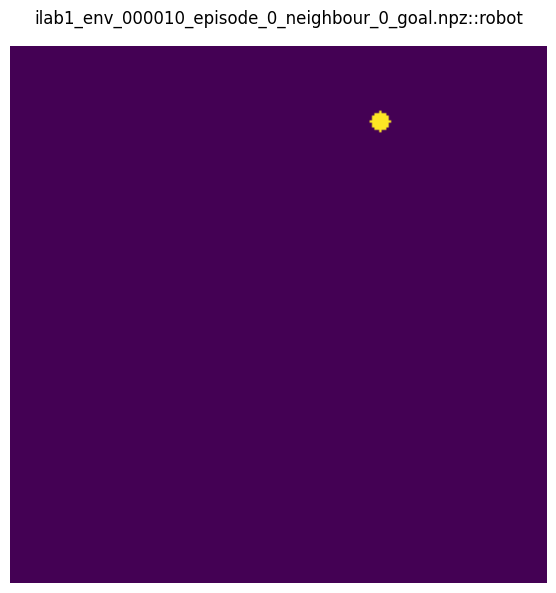

  member: goal  dtype= float32  shape= (224, 224)
   min= 0.0  max= 1.0  mean= 0.0016143176


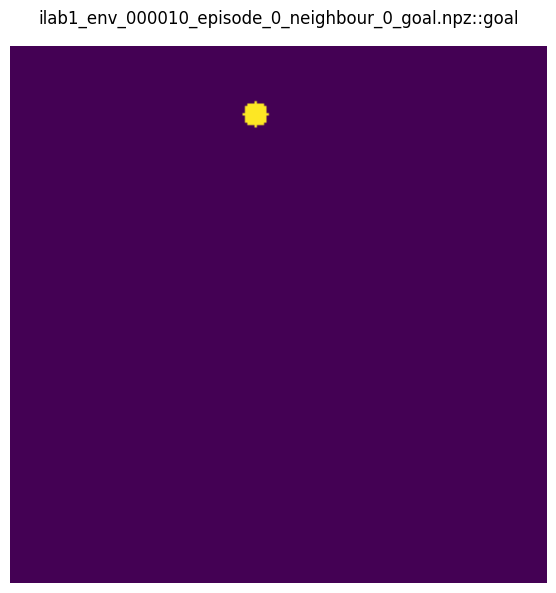

  member: movable  dtype= float32  shape= (224, 224)
   min= 0.0  max= 1.0  mean= 0.055644132


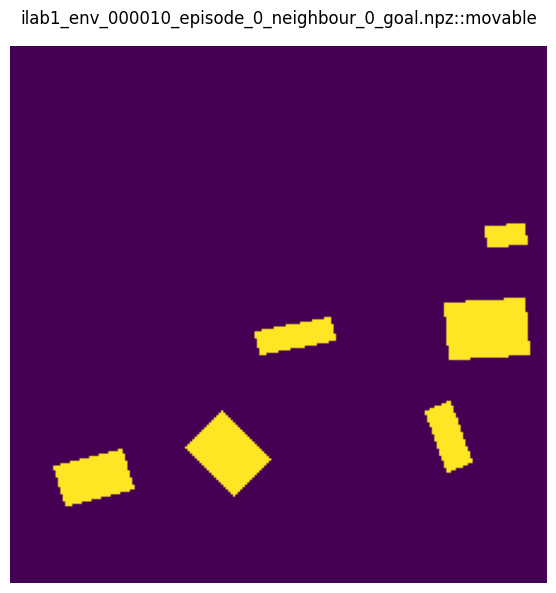

  member: static  dtype= float32  shape= (224, 224)
   min= 0.0  max= 1.0  mean= 0.07214604


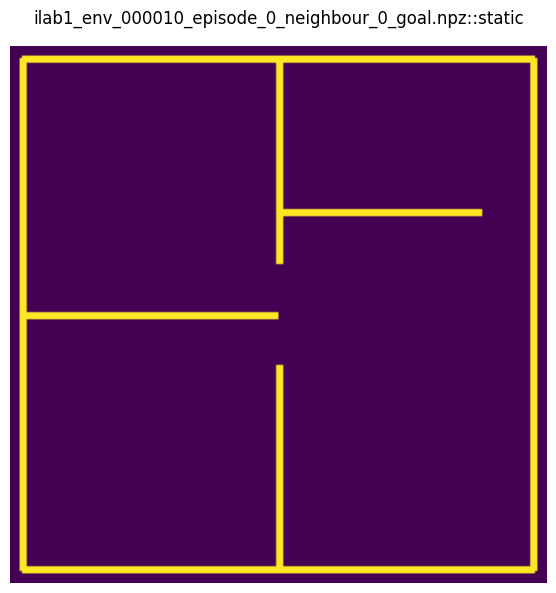

  member: reachable  dtype= float32  shape= (224, 224)
   min= 0.0  max= 1.0  mean= 0.0030691964


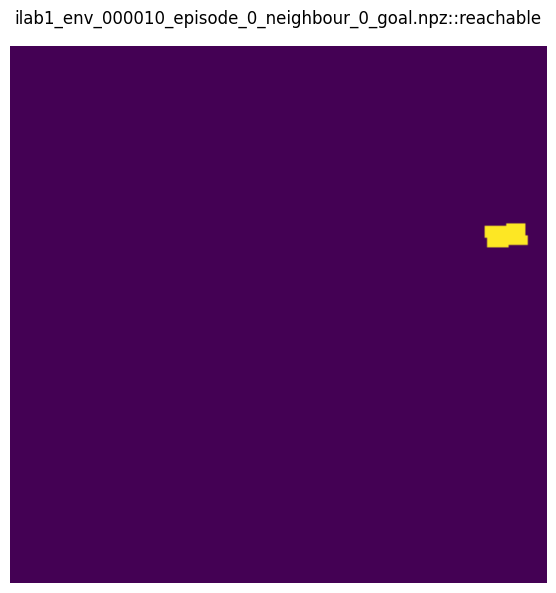

  member: target_object  dtype= float32  shape= (224, 224)
   min= 0.0  max= 1.0  mean= 0.0030691964


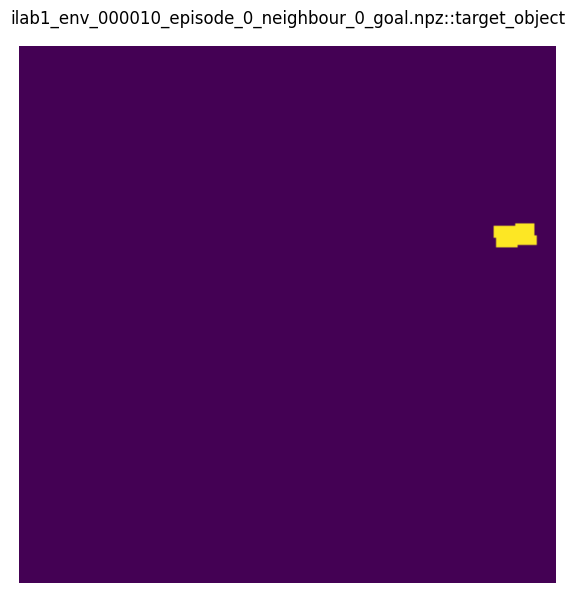

  member: target_goal  dtype= float32  shape= (224, 224)
   min= 0.0  max= 1.0  mean= 0.0027104593


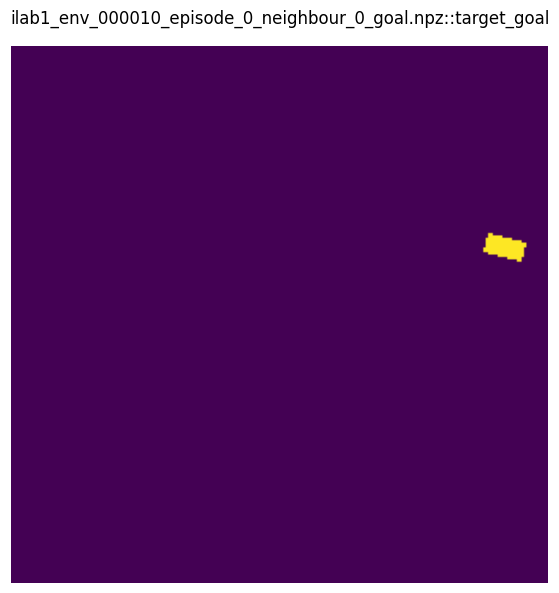

  member: robot_distance  dtype= float32  shape= (224, 224)
   min= -1.0  max= inf  mean= inf


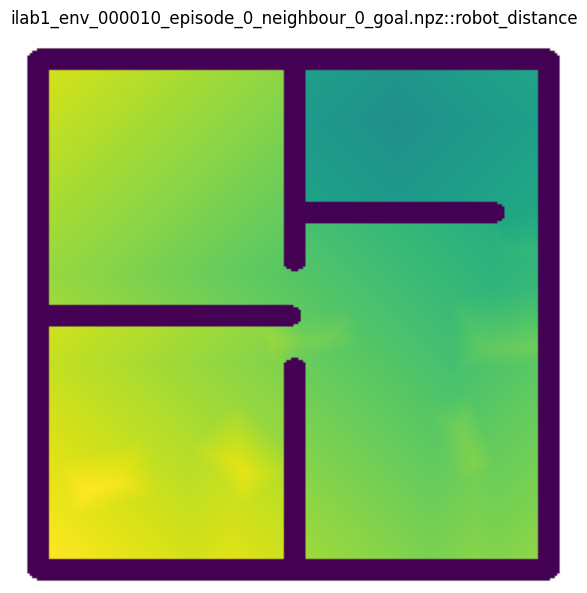

  member: goal_distance  dtype= float32  shape= (224, 224)
   min= -1.0  max= inf  mean= inf


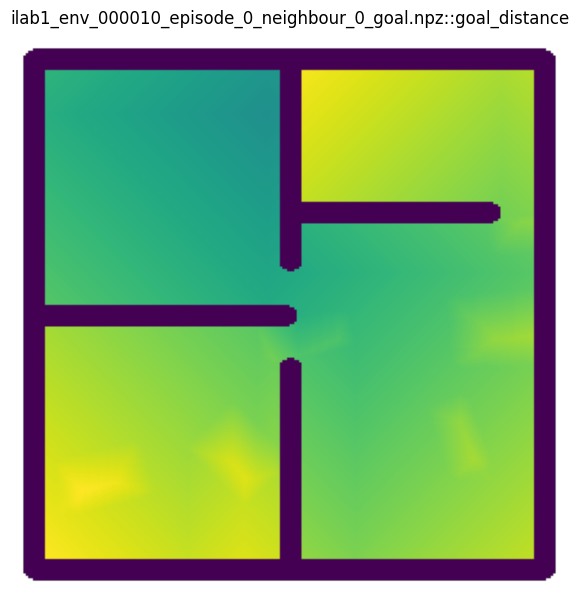

  member: episode_id  dtype= <U43  shape= (1,)
   Not visualizing this member (not recognized as image-like).
  member: task_id  dtype= <U16  shape= (1,)
   Not visualizing this member (not recognized as image-like).
  member: algorithm  dtype= <U22  shape= (1,)
   Not visualizing this member (not recognized as image-like).
  member: solution_depth  dtype= int32  shape= (1,)
   min= 1  max= 1  mean= 1.0
   Not visualizing this member (not recognized as image-like).
  member: search_time_ms  dtype= float32  shape= (1,)
   min= 3025.0413  max= 3025.0413  mean= 3025.0413
   Not visualizing this member (not recognized as image-like).
  member: nodes_expanded  dtype= int32  shape= (1,)
   min= -1  max= -1  mean= -1.0
   Not visualizing this member (not recognized as image-like).
  member: robot_goal  dtype= float32  shape= (3,)
   min= -3.93  max= 0.0  mean= -1.4533334
   Not visualizing this member (not recognized as image-like).
  member: xml_file  dtype= <U100  shape= (1,)
   Not visuali

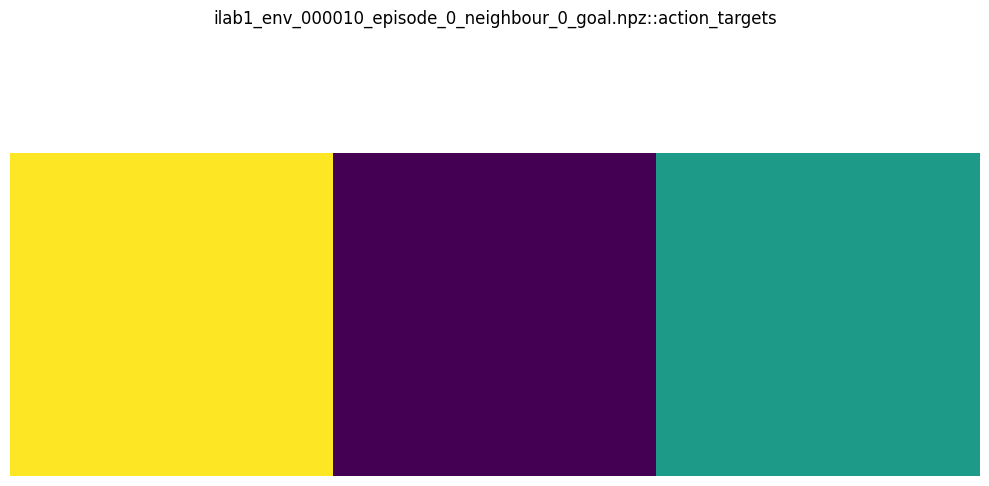


File: /common/users/shared/robot_learning/dm1487/namo/datasets/images/oct26/train/1push/ilab1_env_000010/ilab1_env_000010_episode_0_neighbour_1_goal.npz
 archive members: ['robot', 'goal', 'movable', 'static', 'reachable', 'target_object', 'target_goal', 'robot_distance', 'goal_distance', 'episode_id', 'task_id', 'algorithm', 'solution_depth', 'search_time_ms', 'nodes_expanded', 'robot_goal', 'xml_file', 'action_object_ids', 'action_targets']
  member: robot  dtype= float32  shape= (224, 224)
   min= 0.0  max= 1.0  mean= 0.0009765625


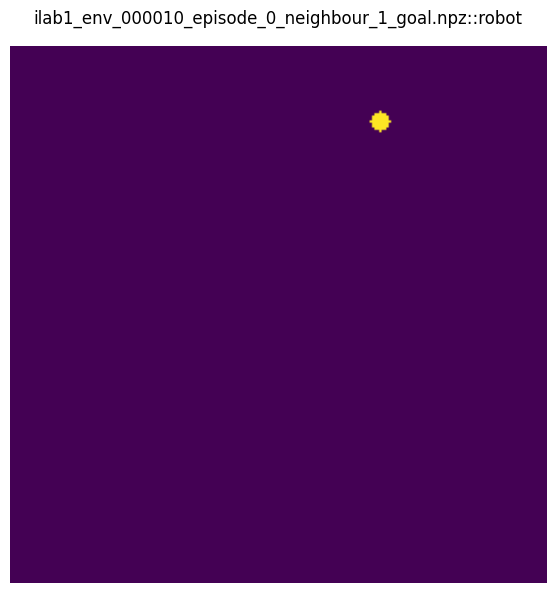

  member: goal  dtype= float32  shape= (224, 224)
   min= 0.0  max= 1.0  mean= 0.0016143176


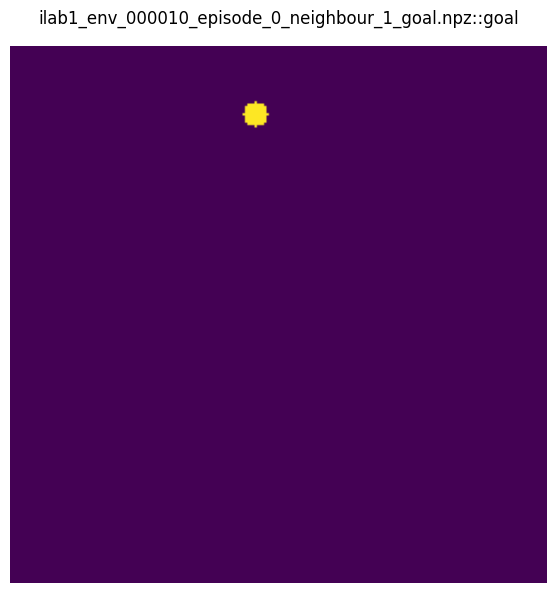

  member: movable  dtype= float32  shape= (224, 224)
   min= 0.0  max= 1.0  mean= 0.055644132


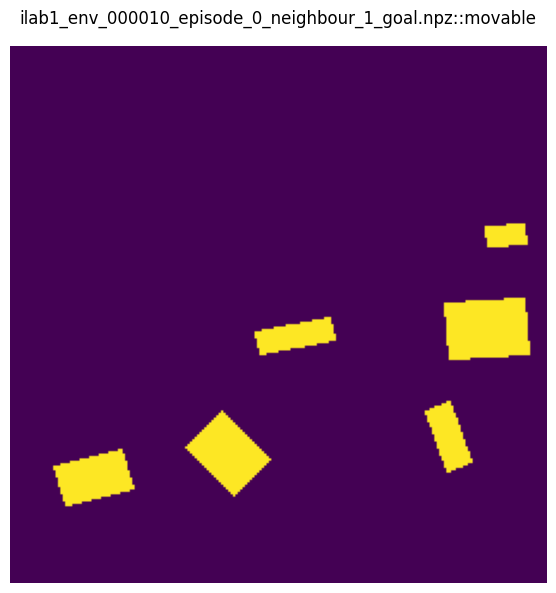

  member: static  dtype= float32  shape= (224, 224)
   min= 0.0  max= 1.0  mean= 0.07214604


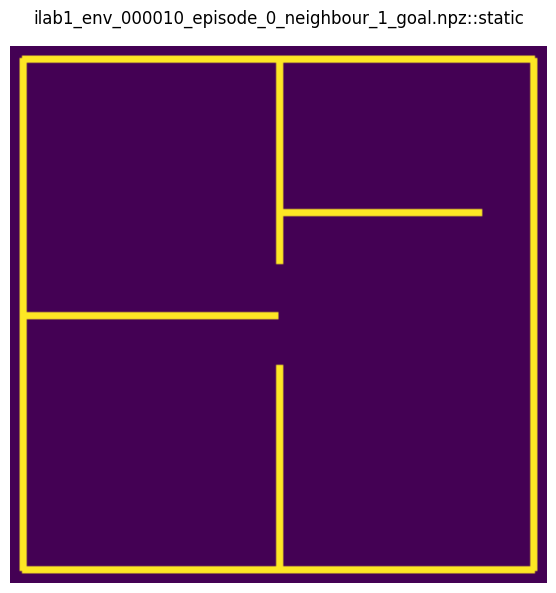

  member: reachable  dtype= float32  shape= (224, 224)
   min= 0.0  max= 1.0  mean= 0.0030691964


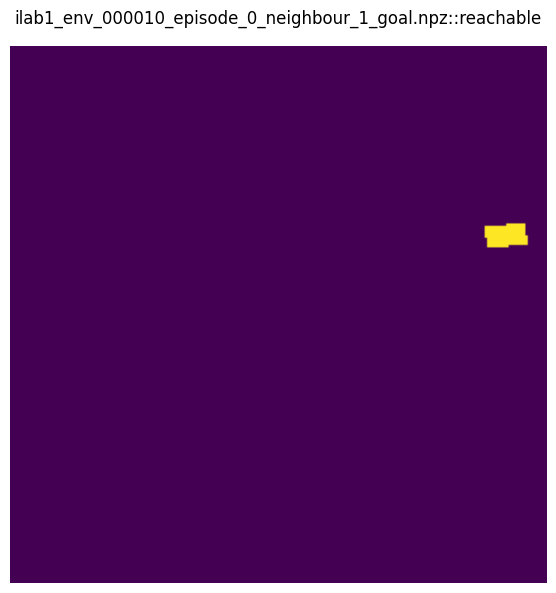

  member: target_object  dtype= float32  shape= (224, 224)
   min= 0.0  max= 1.0  mean= 0.0030691964


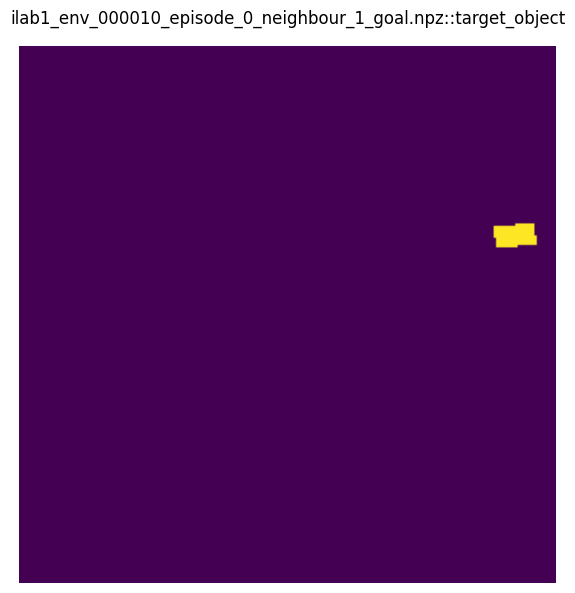

  member: target_goal  dtype= float32  shape= (224, 224)
   min= 0.0  max= 1.0  mean= 0.003109056


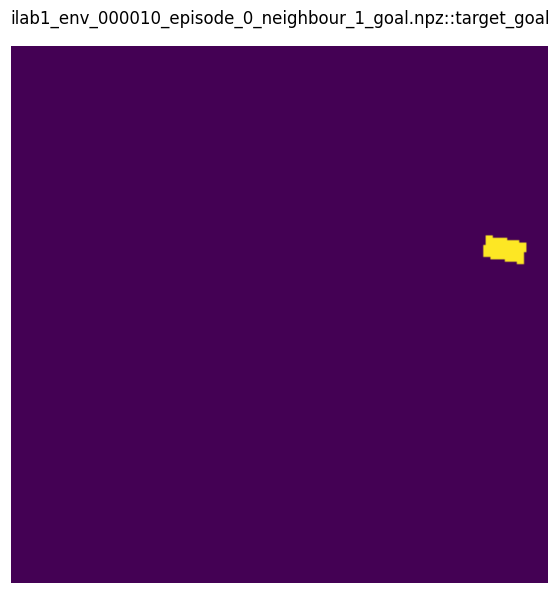

  member: robot_distance  dtype= float32  shape= (224, 224)
   min= -1.0  max= inf  mean= inf


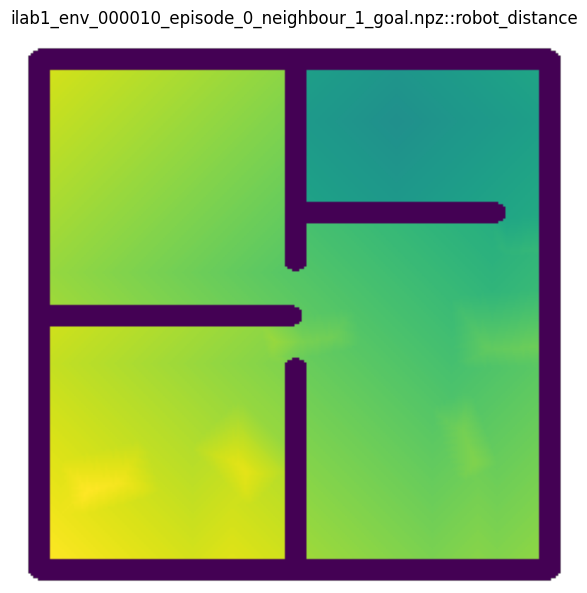

  member: goal_distance  dtype= float32  shape= (224, 224)
   min= -1.0  max= inf  mean= inf


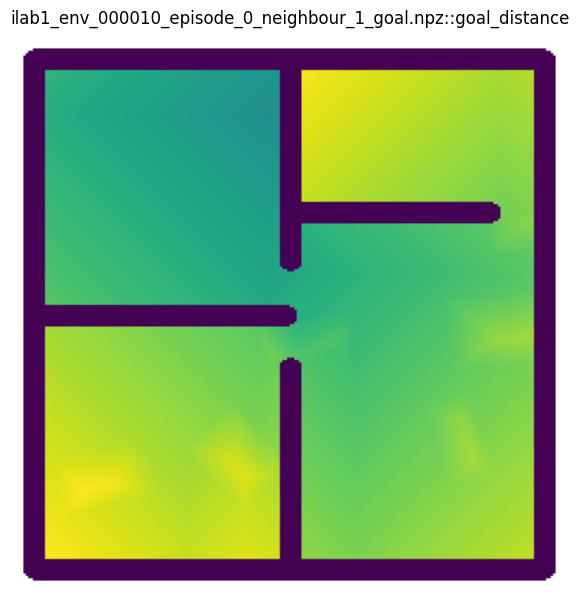

  member: episode_id  dtype= <U43  shape= (1,)
   Not visualizing this member (not recognized as image-like).
  member: task_id  dtype= <U16  shape= (1,)
   Not visualizing this member (not recognized as image-like).
  member: algorithm  dtype= <U22  shape= (1,)
   Not visualizing this member (not recognized as image-like).
  member: solution_depth  dtype= int32  shape= (1,)
   min= 1  max= 1  mean= 1.0
   Not visualizing this member (not recognized as image-like).
  member: search_time_ms  dtype= float32  shape= (1,)
   min= 3025.0627  max= 3025.0627  mean= 3025.0627
   Not visualizing this member (not recognized as image-like).
  member: nodes_expanded  dtype= int32  shape= (1,)
   min= -1  max= -1  mean= -1.0
   Not visualizing this member (not recognized as image-like).
  member: robot_goal  dtype= float32  shape= (3,)
   min= -3.93  max= 0.0  mean= -1.4533334
   Not visualizing this member (not recognized as image-like).
  member: xml_file  dtype= <U100  shape= (1,)
   Not visuali

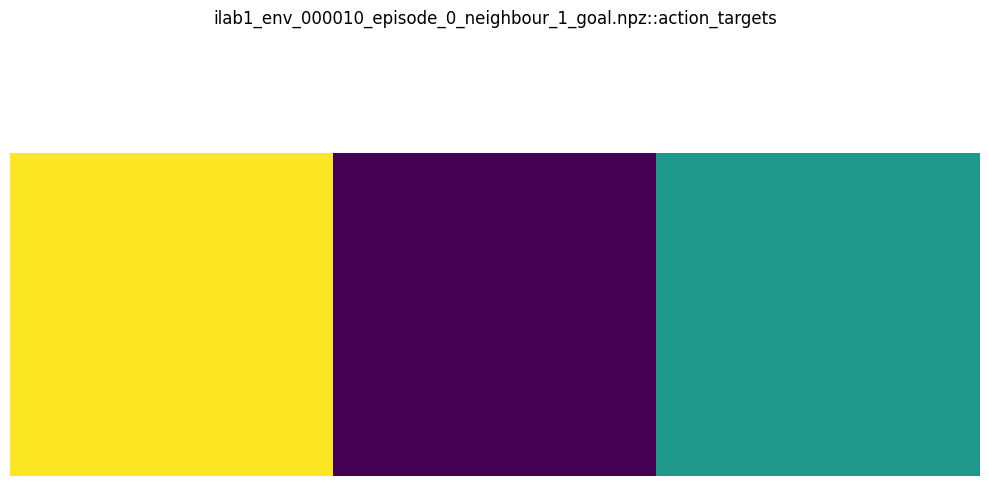

In [5]:
# Load discovered arrays, show summary and visualize image-like arrays
for p in candidates:
    try:
        data = np.load(p, allow_pickle=True)
    except Exception as e:
        print(f'Failed to load {p}:', e)
        continue

    print('\nFile:', p)

    # If this is a .npz archive (np.lib.npyio.NpzFile), iterate its members
    if isinstance(data, np.lib.npyio.NpzFile):
        print(' archive members:', data.files)
        for key in data.files:
            try:
                arr = data[key]
            except Exception as e:
                print('  Failed to read member', key, e)
                continue
            print('  member:', key, ' dtype=', arr.dtype, ' shape=', arr.shape)
            # Process member like a regular array
            if np.issubdtype(arr.dtype, np.number):
                try:
                    print('   min=', np.nanmin(arr), ' max=', np.nanmax(arr), ' mean=', np.nanmean(arr))
                except Exception:
                    pass
            if is_image_like(arr):
                frames = take_sample_frames(arr, max_frames=10)
                proc = []
                for f in frames:
                    if f.ndim == 3 and f.shape[2] == 1:
                        proc.append(f.squeeze(-1))
                    else:
                        proc.append(f)
                show_montage(proc, ncols=5, title=f"{os.path.basename(p)}::{key}")
            else:
                if arr.ndim == 2:
                    show_montage([arr], title=f"{os.path.basename(p)}::{key}")
                elif arr.ndim == 3 and arr.shape[0] < 50:
                    slices = [arr[i] for i in range(min(arr.shape[0], 10))]
                    show_montage(slices, ncols=5, title=f"{os.path.basename(p)}::{key}")
                else:
                    print('   Not visualizing this member (not recognized as image-like).')
    else:
        # Single plain .npy array loaded
        arr = data
        print(' dtype=', arr.dtype, ' shape=', arr.shape)
        if np.issubdtype(arr.dtype, np.number):
            try:
                print(' min=', np.nanmin(arr), ' max=', np.nanmax(arr), ' mean=', np.nanmean(arr))
            except Exception:
                pass
        if is_image_like(arr):
            frames = take_sample_frames(arr, max_frames=10)
            proc = []
            for f in frames:
                if f.ndim == 3 and f.shape[2] == 1:
                    proc.append(f.squeeze(-1))
                else:
                    proc.append(f)
            show_montage(proc, ncols=5, title=os.path.basename(p))
        else:
            if arr.ndim == 2:
                show_montage([arr], title=os.path.basename(p))
            elif arr.ndim == 3 and arr.shape[0] < 50:
                slices = [arr[i] for i in range(min(arr.shape[0], 10))]
                show_montage(slices, ncols=5, title=os.path.basename(p))
            else:
                print('Not visualizing this array (not recognized as image-like).')

In [6]:
# Optional: interactive slider if ipywidgets is installed
try:
    import ipywidgets as widgets
    from IPython.display import display
    def interactive_view(arr):
        # arr is expected to be (T,H,W,C) or (T,H,W)
        if arr.ndim < 3:
            print('array not time-series image-like for interactive view')
            return
        T = arr.shape[0] if arr.ndim == 4 or (arr.ndim == 3 and arr.shape[-1] in (1,3) == False) else 1
        slider = widgets.IntSlider(min=0, max=max(T-1,0), step=1, value=0)
        out = widgets.Output()
        def on_change(change):
            idx = change['new']
            with out:
                out.clear_output(wait=True)
                if arr.ndim == 4:
                    img = arr[idx]
                elif arr.ndim == 3 and arr.shape[-1] in (1,3):
                    img = arr
                else:
                    img = arr[idx]
                plt.imshow(img.squeeze())
                plt.axis('off')
                plt.show()
        slider.observe(on_change, names='value')
        display(slider, out)
    print('ipywidgets available: you can call interactive_view(arr) on a loaded array to interactively browse frames')
except Exception as e:
    print('ipywidgets not available (optional). To enable interactive browsing, install ipywidgets in your environment.')

ipywidgets not available (optional). To enable interactive browsing, install ipywidgets in your environment.


## Setup / virtualenv notes

If you use the `mujoco` virtualenv, activate it first (on systems with virtualenvwrapper):

```bash
workon mujoco
pip install numpy matplotlib imageio ipywidgets
```

If you prefer conda or another environment manager, install the same packages there. The notebook uses only numpy and matplotlib by default; ipywidgets is optional for interactive browsing.